In [235]:
# Compare observations and model downscaling
# climatologies and pdfs

In [236]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore') #filter some warning messages

In [237]:
# locations
locs = ['Inshore','Shelf','Offshore']
depths = [['7m','29m'],['7m','88m'],['7m','540m']]
depnam = ['Surface','Bottom']
# data directory
#ooidir = '~/Documents/LargeData/QIN/OOI_Mooring/'
#glodir = '~/Documents/Largedata/QIN/downscaled_GCMs/'
ooidir = '../data/OOI_Mooring/'
glodir = '../data/downscaled_GCMs_2014-2020/'
# figure directory
#figdir = '/Users/sol/Google Drive/professional/research/projects/2020_QIN/figures/Comparison_Obs_Downscaled/'
figdir = '../figures/Comparison_Obs_Downscaled/'

# Climatologies

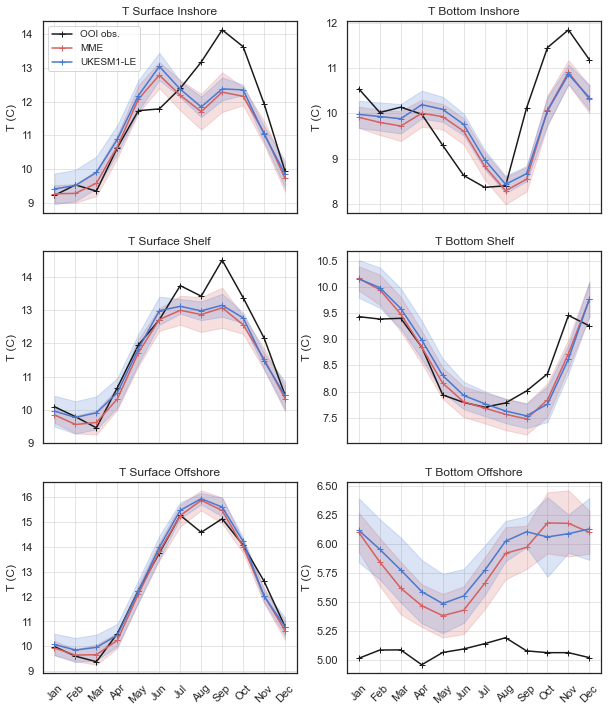

In [238]:
# Temperature
plt.figure(figsize=(10,12))
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
        # calculate climatology for OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        c1 = np.full((12),np.nan)
        s1 = np.full((12),np.nan)
        for k in range(12):
            c1[k] = np.nanmean(insh[insh['Month']==k+1]['T_'+depths[i][j]])
            s1[k] = np.nanstd(insh[insh['Month']==k+1]['T_'+depths[i][j]])
        
        #plt.fill_between(range(12), c1+s1, c1-s1, color='tab:red', alpha=0.2)
        plt.plot(c1,'+-',color='k', label='OOI obs.')
        
        # calculate climatology downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_thetao.csv', index_col=0)
       
        
        mo = np.asarray([int(i[5:7]) for i in insh.index.values])
        
        c1 = np.full((12,9),np.nan)
        s1 = np.full((12,9),np.nan)
        mods = list(insh)
        for kk in range(9): # models
            for k in range(12): # month
                a = mo==k+1
                c1[k][kk] = np.nanmean(insh[a][mods[kk]])
                #s1[k][kk] = np.nanstd(insh[a][mods[kk]])
        mme=[]
        le=[]
        for kk in range(9): # models
            if 'r1' in mods[kk]:
                mme.append(c1[:,kk])     
            if 'UKESM1-0-LL' in mods[kk]:
                le.append(c1[:,kk])
        c2=np.nanmean(mme,axis=0)
        s2=np.nanstd(mme,axis=0)    
        c3=np.nanmean(le,axis=0)
        s3=np.nanstd(le,axis=0)              
            
        plt.fill_between(range(12), c2+s2, c2-s2, color='r', alpha=0.2)
        plt.plot(c2,'+-',color='r', label='MME')
        plt.fill_between(range(12), c3+s3, c3-s3, color='b', alpha=0.2)
        plt.plot(c3,'+-',color='b', label='UKESM1-LE')
    
        #plt.plot(ds.month, ds.sst,'+-',color='k')
    
        plt.grid(True, alpha=0.5)
        plt.ylabel('T (C)')
        if sb>4:
            plt.xticks(range(12),
                ['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec'],
                rotation=45)
        else:
            plt.xticks(range(12),
                [''])
        plt.title('T '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        sb += 1
plt.savefig(figdir+'T_climatologies_OOI.png')
plt.show()


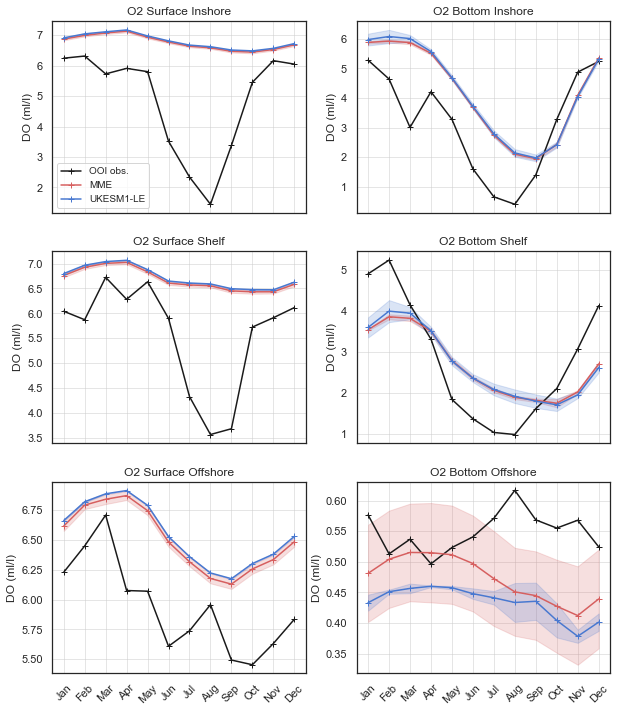

In [239]:
# DO
plt.figure(figsize=(10,12))
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
        # calculate climatology for OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        c1 = np.full((12),np.nan)
        s1 = np.full((12),np.nan)
        for k in range(12):
            ## not surer about the conversion!!! something is weird
            ## i didn't have to convert when did comparison w glorys
            c1[k] = np.nanmean(insh[insh['Month']==k+1]['DO_'+depths[i][j]]/44.66)
            s1[k] = np.nanstd(insh[insh['Month']==k+1]['DO_'+depths[i][j]]/44.66)
        
        #plt.fill_between(range(12), c1+s1, c1-s1, color='k', alpha=0.2)
        plt.plot(c1,'+-',color='k', label='OOI obs.')
        
        # calculate climatology downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_o2.csv', index_col=0)
        mo = np.asarray([int(i[5:7]) for i in insh.index.values])
        c1 = np.full((12,6),np.nan)
        s1 = np.full((12,6),np.nan)
        mods = list(insh)
        for kk in range(6): # models
            for k in range(12): # month
                a = mo==k+1
                c1[k][kk] = np.nanmean(insh[a][mods[kk]])
                #s1[k][kk] = np.nanstd(insh[a][mods[kk]])
        
        mme=[]
        le=[]
        for kk in range(6): # models
            if 'r1' in mods[kk]:
                mme.append(c1[:,kk])     
            if 'UKESM1-0-LL' in mods[kk]:
                le.append(c1[:,kk])
        c2=np.nanmean(mme,axis=0)
        s2=np.nanstd(mme,axis=0)    
        c3=np.nanmean(le,axis=0)
        s3=np.nanstd(le,axis=0)              
            
        plt.fill_between(range(12), c2+s2, c2-s2, color='r', alpha=0.2)
        plt.plot(c2,'+-',color='r', label='MME')
        plt.fill_between(range(12), c3+s3, c3-s3, color='b', alpha=0.2)
        plt.plot(c3,'+-',color='b', label='UKESM1-LE')
      
        #plt.plot(ds.month, ds.sst,'+-',color='k')
    
        plt.grid(True, alpha=0.5)
        plt.ylabel('DO (ml/l)')
        if sb>4:
            plt.xticks(range(12),
                ['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec'],
                rotation=45)
        else:
            plt.xticks(range(12),
                [''])
        plt.title('O2 '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        sb += 1
plt.savefig(figdir+'DO_climatologies_OOI.png')
plt.show()

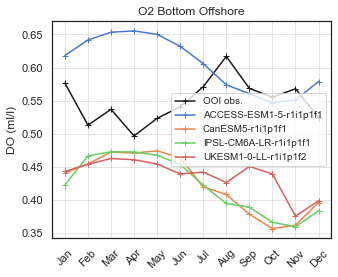

In [240]:
# DO
plt.figure(figsize=(5,4))
sb=1 # subplot
i=2
ix=locs[2]
j=1
plt.subplot(1,1,sb)

# calculate climatology for OOI
insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
c1 = np.full((12),np.nan)
s1 = np.full((12),np.nan)
for k in range(12):
    ## not surer about the conversion!!! something is weird
    ## i didn't have to convert when did comparison w glorys
    c1[k] = np.nanmean(insh[insh['Month']==k+1]['DO_'+depths[i][j]]/44.66)  #convert mmol/kg to ml/l
    s1[k] = np.nanstd(insh[insh['Month']==k+1]['DO_'+depths[i][j]]/44.66)

#plt.fill_between(range(12), c1+s1, c1-s1, color='k', alpha=0.2)
plt.plot(c1,'+-',color='k', label='OOI obs.')

# calculate climatology downscaled models
insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_o2.csv', index_col=0)
mo = np.asarray([int(i[5:7]) for i in insh.index.values])

c1 = np.full((12,6),np.nan)
s1 = np.full((12,6),np.nan)
mods = list(insh)
for kk in range(6): # models
    for k in range(12): # month
        a = mo==k+1
        c1[k][kk] = np.nanmean(insh[a][mods[kk]])
        #s1[k][kk] = np.nanstd(insh[a][mods[kk]])

mme=[]
mme_mdl=[]
le=[]

for kk in range(6): # models
    if 'r1' in mods[kk]:
        mme.append(c1[:,kk])
        mme_mdl.append(mods[kk])
        plt.plot(c1[:,kk],'+-', label=mods[kk])

plt.grid(True, alpha=0.5)
plt.ylabel('DO (ml/l)')

plt.xticks(range(12),
    ['Jan','Feb','Mar','Apr','May','Jun',
    'Jul','Aug','Sep','Oct','Nov','Dec'],
    rotation=45)

plt.title('O2 '+depnam[j]+' '+ix)
plt.legend(fontsize='small', loc=5)

plt.savefig(figdir+'DO_climatologies_OOI_outlier.png')
plt.show()

# PDFs

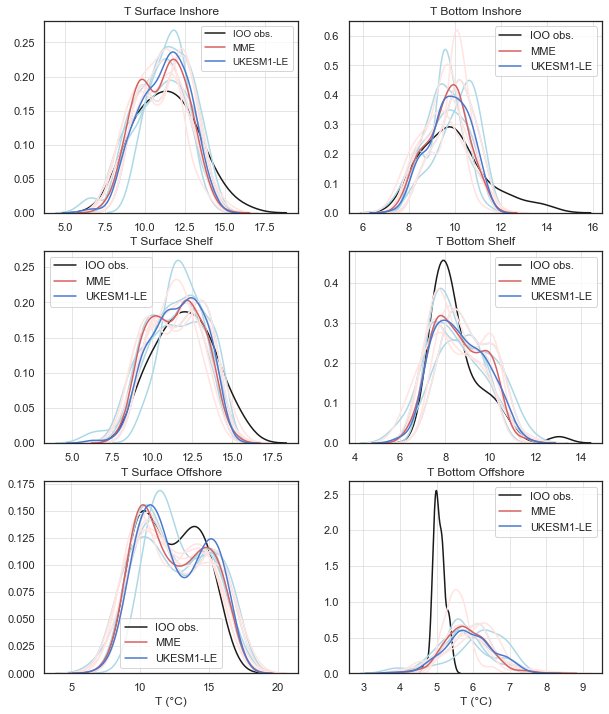

In [241]:
# Temperature
plt.figure(figsize=(10,12))
sns.set(style="white", palette="muted", color_codes=True)
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
        # OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        sns.distplot(insh['T_'+depths[i][j]], hist=False, kde_kws={"label": 'IOO obs.'}, color="k")
        
        # downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_thetao.csv', index_col=0)
        mods = list(insh)
        mme=[]
        le=[]
        n_mme=0
        n_le=0
        for kk in range(9): # models
            if 'r1' in mods[kk]:
                mme.append(insh[mods[kk]]) 
                n_mme+=1
            if 'UKESM1-0-LL' in mods[kk]:
                le.append(insh[mods[kk]])
                n_le+=1
        
        #print(mme)
            
        #tmp = insh.to_numpy()
        #tmp = np.reshape(tmp, (len(tmp)*9))
                  
        for ii in range(n_le):
            sns.distplot(le[ii], hist=False,  color="lightblue")            
        for ii in range(n_mme):
            sns.distplot(mme[ii], hist=False,  color="mistyrose")  
        sns.distplot(mme, hist=False, kde_kws={"label": 'MME'}, color="r")
        sns.distplot(le, hist=False, kde_kws={"label": 'UKESM1-LE'}, color="b")
        
        plt.grid(True, alpha=0.5)
        plt.xlabel('')
        plt.title('T '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        if sb > 4:
            plt.xlabel('T (°C)')

        sb += 1
plt.savefig(figdir+'T_PDF_OOI.png')
plt.show()

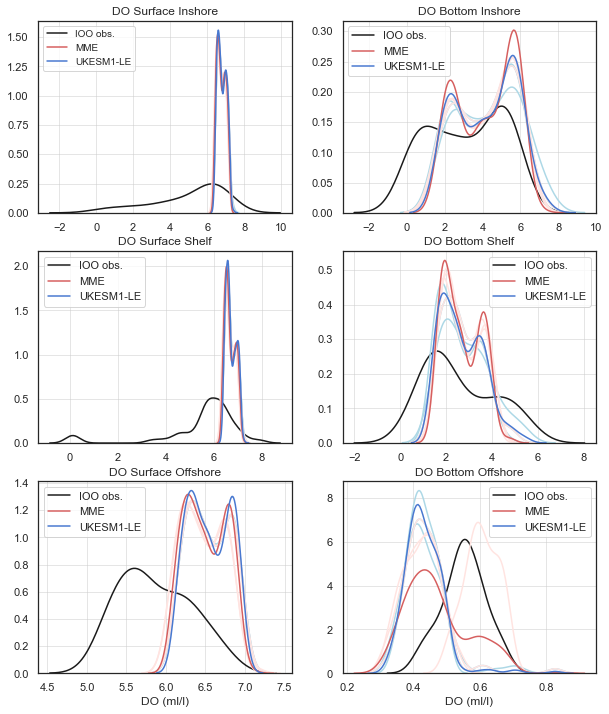

In [242]:
# Temperature
plt.figure(figsize=(10,12))
sns.set(style="white", palette="muted", color_codes=True)
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
        # OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        sns.distplot(insh['DO_'+depths[i][j]]/44.66, hist=False, kde_kws={"label": 'IOO obs.'}, color="k")
        
        # downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_o2.csv', index_col=0)
        mods = list(insh)
        mme=[]
        le=[]
        n_mme=0
        n_le=0
        for kk in range(6): # models
            if 'r1' in mods[kk]:
                mme.append(insh[mods[kk]])  
                n_mme+=1
            if 'UKESM1-0-LL' in mods[kk]:
                le.append(insh[mods[kk]])
                n_le+=1
        
        #tmp = insh.to_numpy()
        #tmp = np.reshape(tmp, (len(tmp)*6))
        for ii in range(n_le):
            sns.distplot(le[ii], hist=False,  color="lightblue")            
        for ii in range(n_mme):
            sns.distplot(mme[ii], hist=False,  color="mistyrose")  

        sns.distplot(mme, hist=False, kde_kws={"label": 'MME'}, color="r")            
        sns.distplot(le, hist=False, kde_kws={"label": 'UKESM1-LE'}, color="b")
        
        plt.grid(True, alpha=0.5)
        plt.xlabel('')
        plt.title('DO '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        if sb > 4:
            plt.xlabel('DO (ml/l)')
        sb += 1
plt.savefig(figdir+'DO_PDF_OOI.png')
plt.show()

# Interannual variablity

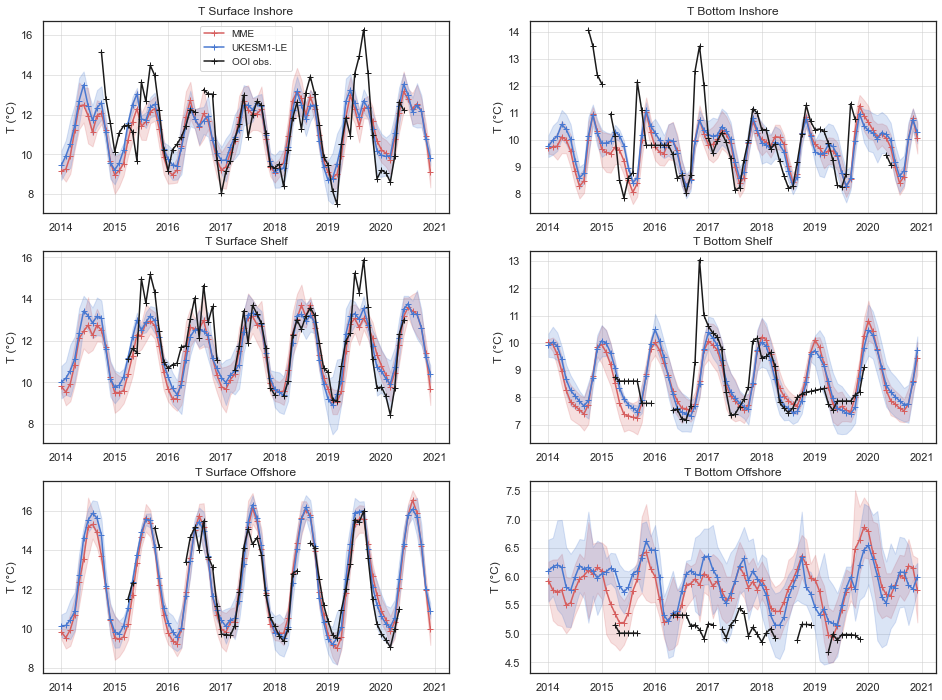

In [243]:
# Temperature
plt.figure(figsize=(16,12))
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
        
       
        # downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_thetao.csv', index_col=0)
        mods = list(insh)
        mme=[]
        le=[]
        n_mme=0
        n_le=0
        for kk in range(9): # models
            if 'r1' in mods[kk]:
                mme.append(insh[mods[kk]]) 
                n_mme+=1
            if 'UKESM1-0-LL' in mods[kk]:
                le.append(insh[mods[kk]])
                n_le+=1

        c2=np.nanmean(mme,axis=0)
        s2=np.nanstd(mme,axis=0)    
        c3=np.nanmean(le,axis=0)
        s3=np.nanstd(le,axis=0)              
        
        time=np.arange(2014, 2021, 1/12)
        plt.fill_between( time, c2+s2, c2-s2, color='r', alpha=0.2)
        plt.plot( time,c2,'+-',color='r', label='MME')
        plt.fill_between( time, c3+s3, c3-s3, color='b', alpha=0.2)
        plt.plot( time,c3,'+-',color='b', label='UKESM1-LE')

        # OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        c1=insh['T_'+depths[i][j]]
        plt.plot(time,c1,'+-',color='k', label='OOI obs.')

        plt.grid(True, alpha=0.5)
        plt.xlabel('')
        plt.ylabel('T (°C)')
        plt.title('T '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        sb += 1
plt.savefig(figdir+'T_TS_OOI.png')
plt.show()

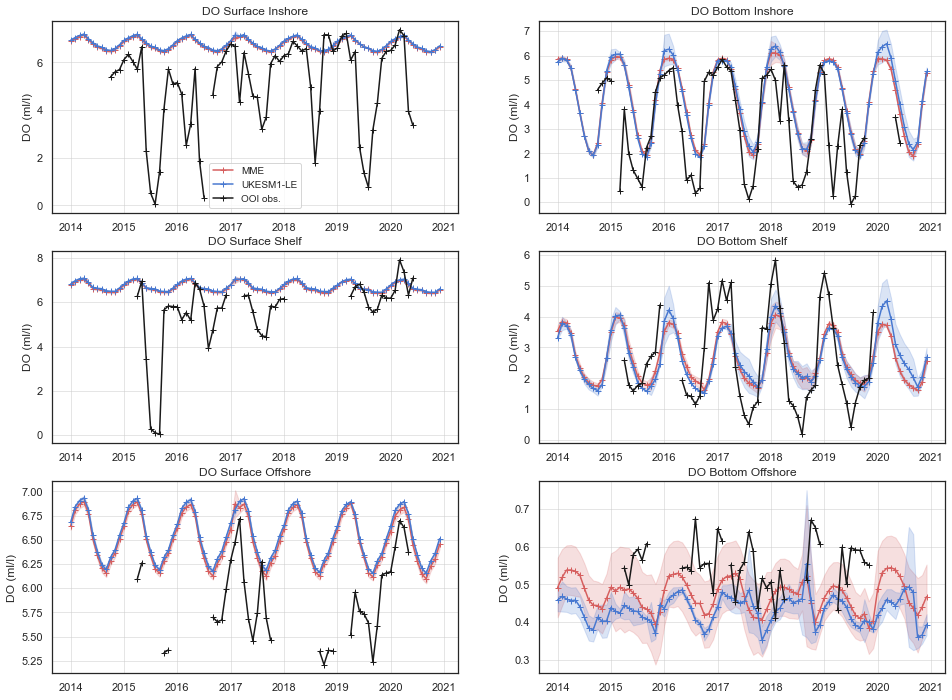

In [244]:
# O2
plt.figure(figsize=(16,12))
sns.set(style="white", palette="muted", color_codes=True)
sb=1 # subplot
for i,ix in enumerate(locs): # locations
    for j in range(2): # depth
        plt.subplot(3,2,sb)
               
        # downscaled models
        insh = pd.read_csv(glodir+'OOI_'+locs[i]+'_'+depnam[j].lower()+'_o2.csv', index_col=0)
        mods = list(insh)
        mme=[]
        le=[]
        n_mme=0
        n_le=0
        for kk in range(6): # models
            if 'r1' in mods[kk]:
                mme.append(insh[mods[kk]])  
                n_mme+=1
            if 'UKESM1-0-LL' in mods[kk]:
                le.append(insh[mods[kk]])
                n_le+=1
        c2=np.nanmean(mme,axis=0)
        s2=np.nanstd(mme,axis=0)    
        c3=np.nanmean(le,axis=0)
        s3=np.nanstd(le,axis=0)              
                
        
        time=np.arange(2014, 2021, 1/12)
        plt.fill_between( time, c2+s2, c2-s2, color='r', alpha=0.2)
        plt.plot( time,c2,'+-',color='r', label='MME')
        plt.fill_between( time, c3+s3, c3-s3, color='b', alpha=0.2)
        plt.plot( time,c3,'+-',color='b', label='UKESM1-LE')
        
        # OOI
        insh = pd.read_csv(ooidir+'QIN_'+locs[i]+'_TSDOS.csv', index_col=0)
        c1=insh['DO_'+depths[i][j]]/44.66
        plt.plot(time,c1,'+-',color='k', label='OOI obs.')

 
     
        plt.grid(True, alpha=0.5)
        plt.xlabel('')
        plt.ylabel('DO (ml/l)')
        plt.title('DO '+depnam[j]+' '+ix)
        if sb==1:
            plt.legend(fontsize='small', loc=0)
        sb += 1
plt.savefig(figdir+'DO_TS_OOI.png')
plt.show()